In [1]:
import random

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Totally random score generates 0.5 of AUC

In [2]:
def label_gen(label_1_percent: int, n: int = 100) -> list:
    label_1_count = int(round((label_1_percent / 100) * n, 0))
    label_1 = [1] * label_1_count
    label_0 = [0] * (n - label_1_count)
    label = label_1 + label_0
    return label

In [3]:
def score_random(n: int = 100) -> list:
    score = []
    for i in range(0, n):
        score.append(random.uniform(0, 1))
    return score

In [4]:
def auc_random(label: list, n: int):
    auc = []
    for i in range(0, n):
        score = score_random(len(label))
        auc.append(roc_auc_score(label, score))
    return auc

count    10000.000000
mean         0.500485
std          0.096379
min          0.158889
25%          0.433333
50%          0.500000
75%          0.567778
max          0.822222
dtype: float64

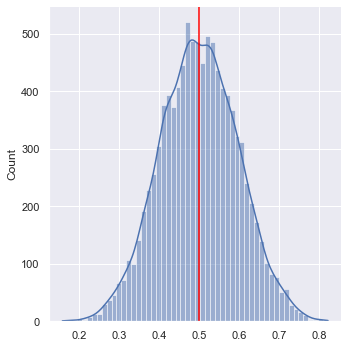

In [5]:
label = label_gen(10)
auc = auc_random(label, 10000)
sns.displot(auc, kde=True)
plt.axvline(x=np.mean(auc), color='red');
pd.Series(auc).describe()

## The imbalance level does not impact on the expected AUC but does impact on the standard deviation

In [32]:
def auc_mean_std(label_1_percent: int, n: int):
    label = label_gen(label_1_percent)
    auc = auc_random(label, n)
    mean = np.mean(auc)
    std = np.std(auc)
    return mean, std

In [47]:
mean = []
std = []
for i in range(1, 100):
    mean_i, std_i = auc_mean_std(i, 1000)
    mean.append(mean_i)
    std.append(std_i)

count    99.000000
mean      0.500123
std       0.003380
min       0.486000
25%       0.498332
50%       0.500112
75%       0.502258
max       0.510891
dtype: float64

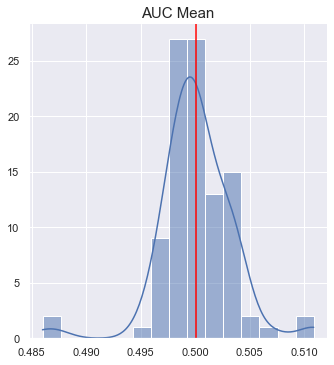

In [48]:
sns.displot(mean, kde=True)
plt.axvline(x=np.mean(mean), color='red')
plt.xlabel('')
plt.ylabel('')
plt.title('AUC Mean', size=15);

pd.Series(mean).describe()

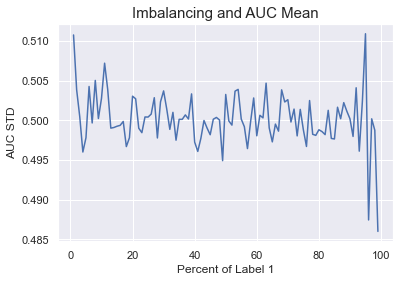

In [49]:
sns.lineplot(x=range(1, 100), y=mean)
plt.xlabel('Percent of Label 1')
plt.ylabel('AUC STD')
plt.title('Imbalancing and AUC Mean', size=15);

count    99.000000
mean      0.083423
std       0.042412
min       0.055631
25%       0.060360
50%       0.066856
75%       0.086391
max       0.286886
dtype: float64

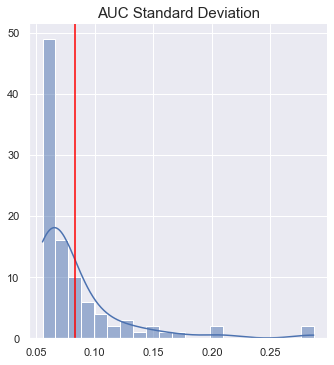

In [50]:
sns.displot(std, kde=True)
plt.axvline(x=np.mean(std), color='red')
plt.xlabel('')
plt.ylabel('')
plt.title('AUC Standard Deviation', size=15);
pd.Series(std).describe()

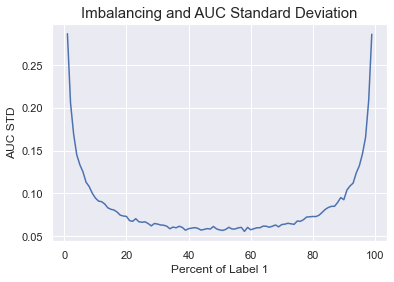

In [51]:
sns.lineplot(x=range(1, 100), y=std)
plt.xlabel('Percent of Label 1')
plt.ylabel('AUC STD')
plt.title('Imbalancing and AUC Standard Deviation', size=15);

The more imbalancing, the higher standard deviation of AUC.

## How high is 0.9 of AUC?

In [11]:
label = label_gen(10)
score = np.arange(0, 1, 0.01)
score = pd.Series(score).sort_values(ascending=False)

In [12]:
roc_auc_score(label, score)

1.0

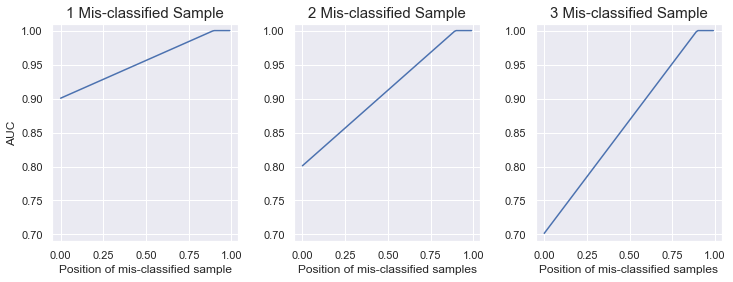

In [13]:
plt.figure(figsize=(12, 4))

auc = []
for i in np.arange(0, 1, 0.01):
    data = (
        pd.DataFrame({'label': label, 'score': score})
        .sort_values('score', ascending=False)
        .replace(0.99, i)
    )
    auc_i = roc_auc_score(data.label, data.score)
    auc.append(auc_i)
plt.subplot(1, 3, 1)
plt.subplots_adjust(wspace=0.3)
sns.lineplot(x=np.arange(0, 1, 0.01), y=auc)
plt.ylim(0.69, 1.01)
plt.title('1 Mis-classified Sample', size=15)
plt.ylabel('AUC')
plt.xlabel('Position of mis-classified sample');

auc = []
for i in np.arange(0, 1, 0.01):
    data = (
        pd.DataFrame({'label': label, 'score': score})
        .sort_values('score', ascending=False)
        .replace(0.99, i)
        .replace(0.98, i)
    )
    auc_i = roc_auc_score(data.label, data.score)
    auc.append(auc_i)
plt.subplot(1, 3, 2)
plt.subplots_adjust(wspace=0.3)
sns.lineplot(x=np.arange(0, 1, 0.01), y=auc)
plt.ylim(0.69, 1.01)
plt.title('2 Mis-classified Sample', size=15)
plt.xlabel('Position of mis-classified samples');

auc = []
for i in np.arange(0, 1, 0.01):
    data = (
        pd.DataFrame({'label': label, 'score': score})
        .sort_values('score', ascending=False)
        .replace(0.99, i)
        .replace(0.98, i)
        .replace(0.97, i)
    )
    auc_i = roc_auc_score(data.label, data.score)
    auc.append(auc_i)
plt.subplot(1, 3, 3)
plt.subplots_adjust(wspace=0.3)
sns.lineplot(x=np.arange(0, 1, 0.01), y=auc)
plt.ylim(0.69, 1.01)
plt.title('3 Mis-classified Sample', size=15)
plt.xlabel('Position of mis-classified samples');

In 9:1 imbalanced problem, 0.9 of AUC means one sample is totally mis-classified. Or roughly 2 or 3 samples are partially mis-classified.

## Perfect AUC is not equivalent to high F1

In [14]:
def get_f1(label: list, score: list, threshold: float) -> float:
    pred_label = [1 if x >= threshold else 0 for x in score]
    f1 = f1_score(label, pred_label)
    return f1

def get_recall(label: list, score: list, threshold: float) -> float:
    pred_label = [1 if x >= threshold else 0 for x in score]
    recall = recall_score(label, pred_label)
    return recall

def get_precision(label: list, score: list, threshold: float) -> float:
    pred_label = [1 if x >= threshold else 0 for x in score]
    precision = precision_score(label, pred_label)
    return precision

Given the scores generate perfect 1.0 of AUC.


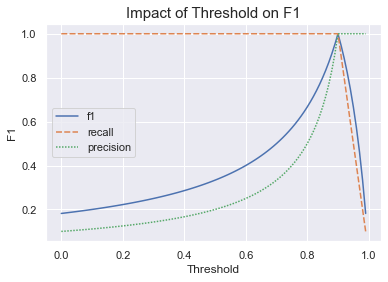

In [15]:
label = label_gen(10)
score = np.arange(0, 1, 0.01)
score = pd.Series(score).sort_values(ascending=False)

f1 = []
recall = []
precision = []
for i in np.arange(0, 1, 0.01):
    f1.append(get_f1(label, score, i))
    recall.append(get_recall(label, score, i))
    precision.append(get_precision(label, score, i))
data = pd.DataFrame({
    'f1': f1,
    'recall': recall,
    'precision': precision
}, index=np.arange(0, 1, 0.01))
    
sns.lineplot(data=data)
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.title('Impact of Threshold on F1', size=15);
print('Given the scores generate perfect 1.0 of AUC.')

## The best F1 (=1) is obtained by threshold N / (P + N) in case perfect AUC

In [16]:
score = np.arange(0, 1, 0.01)
score = pd.Series(score).sort_values(ascending=False)

In [17]:
def max_f1_threshold(label: list, score: list) -> float:
    f1 = []
    for threshold in np.arange(0, 1, 0.01):
        f1_i = get_f1(label, score, threshold)
        f1.append(f1_i)
    max_idx = np.argmax(f1)
    best_threshold = np.arange(0, 1, 0.01)[max_idx]
    return best_threshold

In [18]:
best_threshold = []
for label_1_percent in range(1, 100):
    label = label_gen(label_1_percent)
    best_threshold_i = max_f1_threshold(label, score)
    best_threshold.append(best_threshold_i)

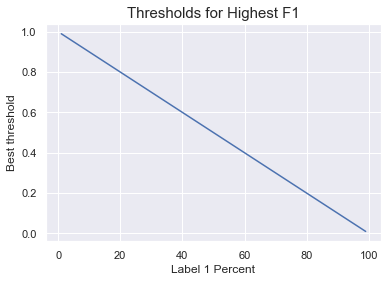

In [19]:
sns.lineplot(x=range(1, 100), y=best_threshold)
plt.xlabel('Label 1 Percent')
plt.ylabel('Best threshold')
plt.title('Thresholds for Highest F1', size=15);

## For random score, the best threshold is a convex function of label 1 percent

In [20]:
random.seed(2)
score = score_random(100)

In [21]:
best_threshold = []
for label_1_percent in range(1, 100):
    label = label_gen(label_1_percent)
    best_threshold_i = max_f1_threshold(label, score)
    best_threshold.append(best_threshold_i)

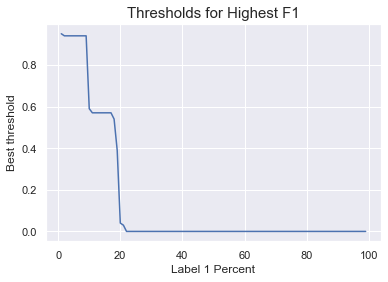

In [22]:
sns.lineplot(x=range(1, 100), y=best_threshold)
plt.xlabel('Label 1 Percent')
plt.ylabel('Best threshold');
plt.title('Thresholds for Highest F1', size=15);

In [23]:
best_thresholds = []
for i in range(0, 100):
    best_threshold = []
    for label_1_percent in range(1, 100):
        label = label_gen(label_1_percent)
        score = score_random(100)
        best_threshold_i = max_f1_threshold(label, score)
        best_threshold.append(best_threshold_i)
    best_thresholds.append(best_threshold)

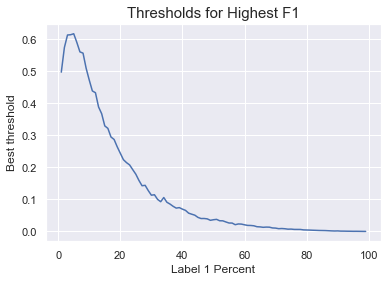

In [30]:
sns.lineplot(x=range(1, 100), y=np.mean(best_thresholds, axis=0))
plt.xlabel('Label 1 Percent')
plt.ylabel('Best threshold')
plt.title('Thresholds for Highest F1', size=15);

In [31]:
pd.Series(np.mean(best_thresholds, axis=0)).head(10)

0    0.49788
1    0.57495
2    0.61396
3    0.61482
4    0.61791
5    0.59095
6    0.56121
7    0.55731
8    0.51002
9    0.47317
dtype: float64